# Declaration of Originality

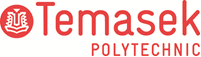

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  :
* Tutorial Group                :  
* Tutor						    :  
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [33]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score 

# 1. Business Understanding
Goal: ?

# 2. Data Understanding

## 2.1 Load dataset

In [34]:
## Read *.csv file into pandas DataFrame
FILE_PATH = "student_lifestyle_dataset..csv"
df = pd.read_csv(FILE_PATH)
df

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,Stress_Level,Gender,Grades
0,1,6.9,3.8,8.7,2.8,1.8,Moderate,Male,7.48
1,2,5.3,3.5,8.0,4.2,3.0,Low,Female,6.88
2,3,5.1,3.9,9.2,1.2,4.6,Low,Male,6.68
3,4,6.5,2.1,7.2,1.7,6.5,Moderate,Male,7.20
4,5,8.1,0.6,6.5,2.2,6.6,High,Male,8.78
...,...,...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,Moderate,Male,8.30
1996,1997,6.3,2.8,8.8,1.5,4.6,Moderate,Female,6.62
1997,1998,6.2,0.0,6.2,0.8,10.8,Moderate,Male,7.85
1998,1999,8.1,0.7,7.6,3.5,4.1,High,Male,7.60


## 2.2 Summary Statistics

In [35]:
## Understand the type of variable for each column
df.head()
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   Stress_Level                     2000 non-null   object 
 7   Gender                           2000 non-null   object 
 8   Grades                           2000 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 140.8+ KB


(2000, 9)

In [36]:
df.nunique()

Student_ID                         2000
Study_Hours_Per_Day                  51
Extracurricular_Hours_Per_Day        41
Sleep_Hours_Per_Day                  51
Social_Hours_Per_Day                 61
Physical_Activity_Hours_Per_Day     118
Stress_Level                          3
Gender                                2
Grades                              158
dtype: int64

In [37]:
## Check for missing data
df.isna().sum()

Student_ID                         0
Study_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Sleep_Hours_Per_Day                0
Social_Hours_Per_Day               0
Physical_Activity_Hours_Per_Day    0
Stress_Level                       0
Gender                             0
Grades                             0
dtype: int64

In [38]:
df.duplicated().sum()

np.int64(0)

In [39]:
# Check if any row has missing values
df.isnull().any(axis=1).sum()

np.int64(0)

In [40]:
## Describe data distribution
df.describe()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,Grades
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,1000.500000,7.475800,1.990100,7.501250,2.704550,4.32830,7.789825
std,577.494589,1.423888,1.155855,1.460949,1.688514,2.51411,0.746777
min,1.000000,5.000000,0.000000,5.000000,0.000000,0.00000,5.600000
25%,500.750000,6.300000,1.000000,6.200000,1.200000,2.40000,7.250000
50%,1000.500000,7.400000,2.000000,7.500000,2.600000,4.10000,7.780000
75%,1500.250000,8.700000,3.000000,8.800000,4.100000,6.10000,8.320000
max,2000.000000,10.000000,4.000000,10.000000,6.000000,13.00000,10.000000


In [41]:
df["Stress_Level"].value_counts()
df["Stress_Level"].value_counts(normalize=True)

Stress_Level
High        0.5145
Moderate    0.3370
Low         0.1485
Name: proportion, dtype: float64

In [42]:
# Separate numeric/categorical columns 
X_temp = df.drop(columns=["Stress_Level"])
cat_cols = X_temp.select_dtypes(include=["object"]).columns.tolist()
num_cols = X_temp.select_dtypes(exclude=["object"]).columns.tolist()

print("Categorical columns:", cat_cols)
print("Numeric columns:", num_cols)

Categorical columns: ['Gender']
Numeric columns: ['Student_ID', 'Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'Grades']


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

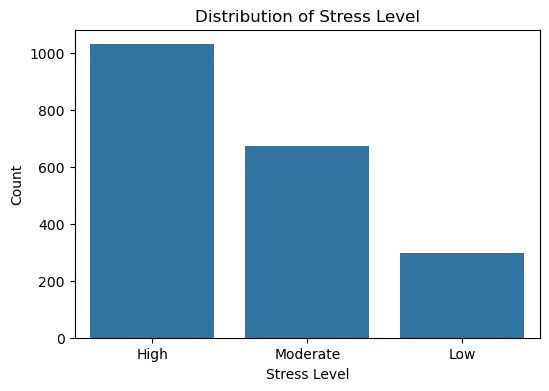

In [43]:
## Understanding distribution of target
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Stress_Level", order=df["Stress_Level"].value_counts().index)
plt.xlabel("Stress Level")
plt.ylabel("Count")
plt.title("Distribution of Stress Level")
plt.show()

### 2.3.1.2 Understanding distribution of features

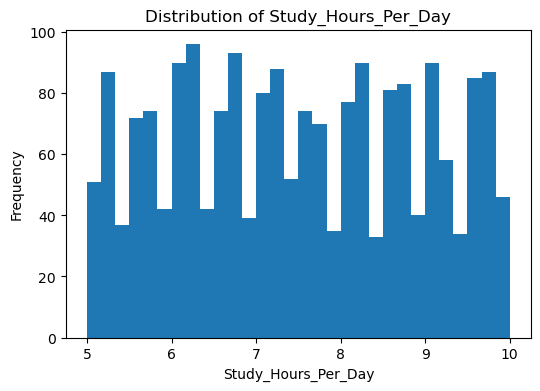

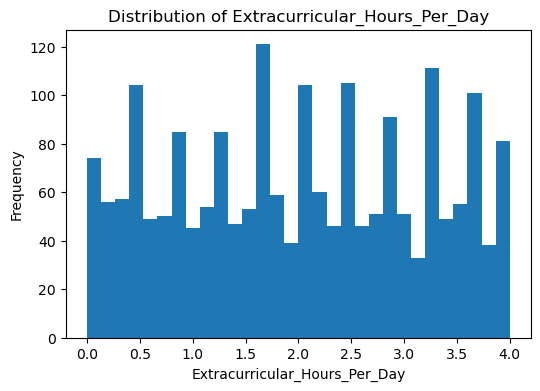

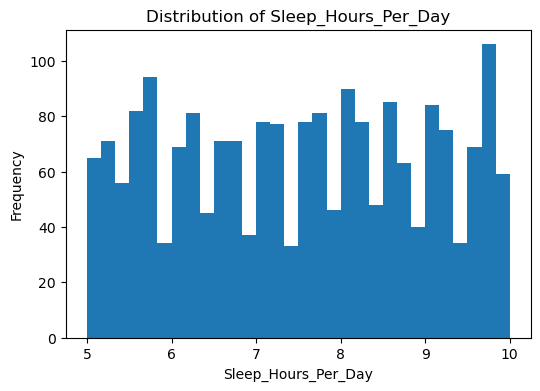

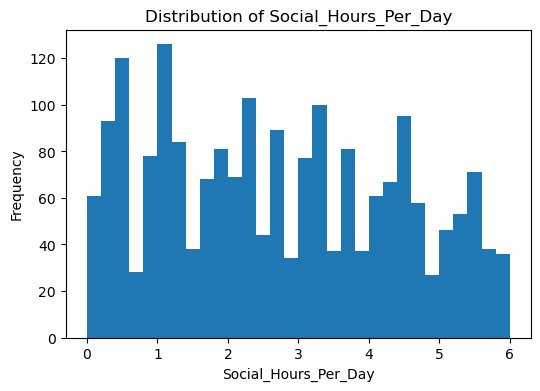

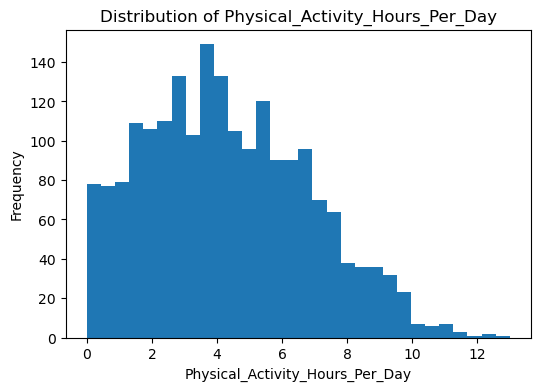

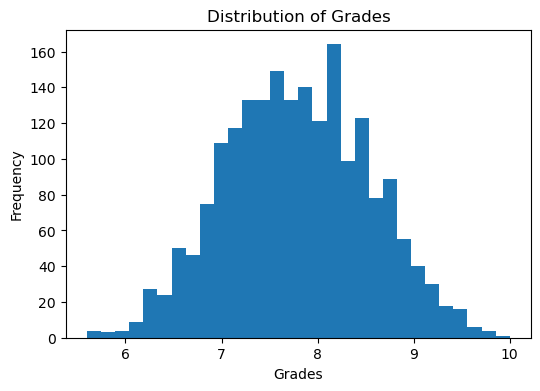

In [44]:
## Understanding distribution of features
num_features = [
    "Study_Hours_Per_Day",
    "Extracurricular_Hours_Per_Day",
    "Sleep_Hours_Per_Day",
    "Social_Hours_Per_Day",
    "Physical_Activity_Hours_Per_Day",
    "Grades"
]

for col in num_features:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=30)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {col}")
    plt.show()


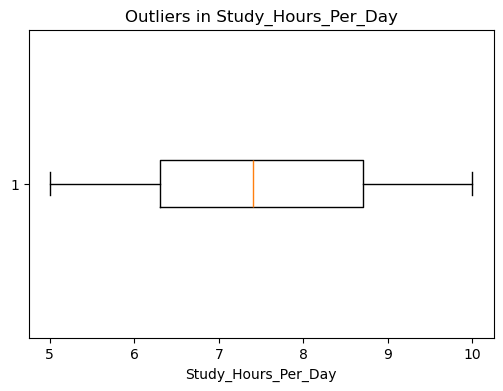

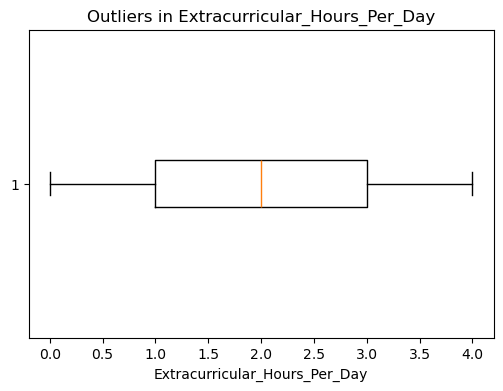

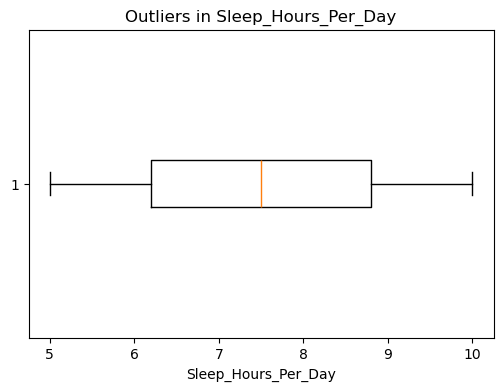

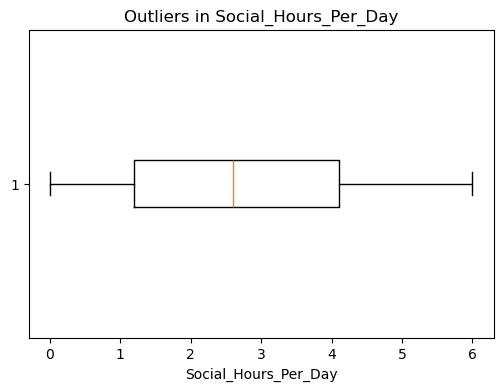

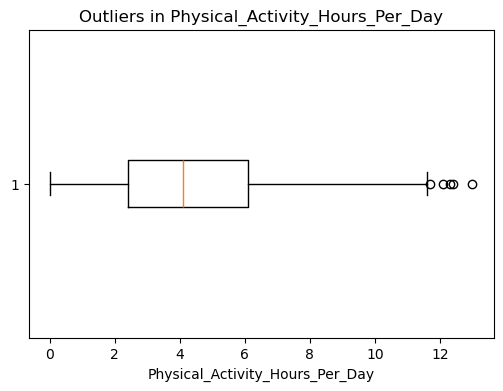

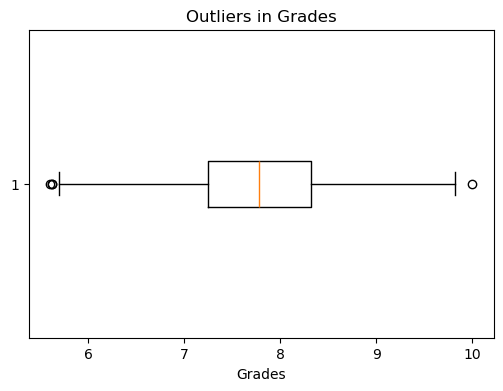

In [45]:
for col in num_features:
    plt.figure(figsize=(6,4))
    plt.boxplot(df[col], vert=False)
    plt.xlabel(col)
    plt.title(f"Outliers in {col}")
    plt.show()

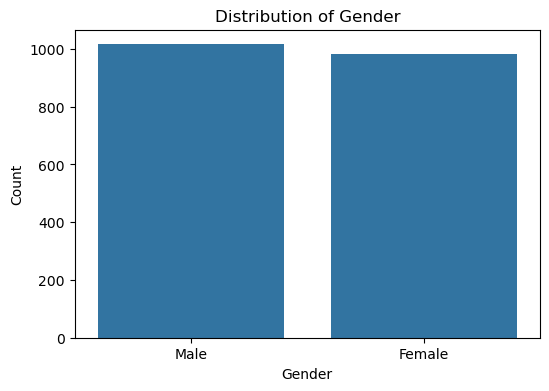

In [46]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Gender", order=df["Gender"].value_counts().index)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of Gender")
plt.show()

In [47]:
df["Gender"].value_counts(normalize=True) * 100

Gender
Male      50.8
Female    49.2
Name: proportion, dtype: float64

### 2.3.2 Understanding relationship between variables

In [1]:
## Understanding relationship between variables


# 3. Data Preparation

## 3.1 Data Cleaning

In [52]:
## Clean data
# Drop identifier column

## 3.2 Train-Test Split

In [53]:
## Split data into train set and test set



# 4. Modelling

### 4.2 Train Model

In [54]:
## Initialise and train model



# 5. Model Evaluation

In [55]:
## Evaluate model


## Iterative model development


In [56]:
## Further feature engineering / feature selection